# **Sample And Explore**

In this notebook, we will explore the data and try to find some insights. We will also try to find some patterns in the data which will help us in feature engineering and model building.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
#Load the datasets.
df_en1 = pd.read_csv('daasbstp2023/energia_202109-202112.csv', na_filter=False, encoding = "latin")
df_en2 = pd.read_csv('daasbstp2023/energia_202201-202212.csv', na_filter=False, encoding = "latin")
df_me1 = pd.read_csv('daasbstp2023/meteo_202109-202112.csv', na_filter=False, encoding = "latin")
df_me2 = pd.read_csv('daasbstp2023/meteo_202201-202212.csv', na_filter=False, encoding = "latin")

In [3]:
#Append the datasets by type.
df_energy = df_en1._append(df_en2,ignore_index=True)
df_meteorology = df_me1._append(df_me2,ignore_index=True)

## **Energy Consumption Dataset (df_energy)**

This dataset provides information on energy consumption recorded at different timestamps. Each record includes the following columns:

- **Data (Date):** The timestamp associated with the record, indicating the date.
- **Hora (Hour):** The hour associated with the record.
- **Normal (kWh):** The amount of electrical energy consumed, in kilowatt-hours (kWh), from the electrical grid during a normal period in daily bi-hourly cycles (non-off-peak hours).
- **Horário Económico (kWh):** The amount of electrical energy consumed, in kilowatt-hours (kWh), from the electrical grid during an economic period in daily bi-hourly cycles (off-peak hours).
- **Autoconsumo (kWh):** The amount of electrical energy consumed, in kilowatt-hours (kWh), generated from solar panels (self-consumption).
- **Injeção na rede (kWh):** A qualitative feature indicating the level of energy injection into the grid on a scale of None, Low, Medium, High, and Very High.

In [4]:
df_energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11016 entries, 0 to 11015
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Data                     11016 non-null  object 
 1   Hora                     11016 non-null  int64  
 2   Normal (kWh)             11016 non-null  float64
 3   Horário Económico (kWh)  11016 non-null  float64
 4   Autoconsumo (kWh)        11016 non-null  float64
 5   Injeção na rede (kWh)    11016 non-null  object 
dtypes: float64(3), int64(1), object(2)
memory usage: 516.5+ KB


In [5]:
df_energy.iloc[901].to_frame().T

,Data,Hora,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),Injeção na rede (kWh)
901,2021-11-05,13,0.0,0.0,0.274,Very High


In [6]:
df_energy.isna().any()

Data                       False
Hora                       False
Normal (kWh)               False
Horário Económico (kWh)    False
Autoconsumo (kWh)          False
Injeção na rede (kWh)      False
dtype: bool

In [7]:
# Unique values for each column in the Energy dataset.
for column in df_energy.columns:
    unique_values = df_energy[column].unique()
    print(f"{column}, Number of Unique Values: {len(unique_values)}")

Data, Number of Unique Values: 459
Hora, Number of Unique Values: 24
Normal (kWh), Number of Unique Values: 1282
Horário Económico (kWh), Number of Unique Values: 851
Autoconsumo (kWh), Number of Unique Values: 752
Injeção na rede (kWh), Number of Unique Values: 5


## **Weather Information Dataset**

This dataset provides comprehensive information related to weather conditions at different timestamps. The columns in the dataset include:

- **dt (Timestamp):** The timestamp associated with the record.
- **dt_iso (ISO Date):** The date associated with the record, accurate to the second.
- **city_name:** The location for which weather data is recorded.
- **temp (Temperature):** The temperature in degrees Celsius.
- **feels_like (Feels Like):** The perceived temperature in degrees Celsius.
- **temp_min (Min Temperature):** The minimum felt temperature in degrees Celsius.
- **temp_max (Max Temperature):** The maximum felt temperature in degrees Celsius.
- **pressure:** Atmospheric pressure in atmospheres.
- **sea_level:** Atmospheric pressure at sea level in atmospheres.
- **grnd_level:** Atmospheric pressure at local altitude in atmospheres.
- **humidity:** Humidity level as a percentage.
- **wind_speed:** Wind speed in meters per second.
- **rain_1h (Rainfall):** Average precipitation value in the last hour.
- **clouds_all (Cloudiness):** Cloud coverage percentage.
- **weather_description:** Qualitative assessment of weather conditions.

In [8]:
df_meteorology.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11688 entries, 0 to 11687
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   dt                   11688 non-null  int64  
 1   dt_iso               11688 non-null  object 
 2   city_name            11688 non-null  object 
 3   temp                 11688 non-null  float64
 4   feels_like           11688 non-null  float64
 5   temp_min             11688 non-null  float64
 6   temp_max             11688 non-null  float64
 7   pressure             11688 non-null  int64  
 8   sea_level            11688 non-null  object 
 9   grnd_level           11688 non-null  object 
 10  humidity             11688 non-null  int64  
 11  wind_speed           11688 non-null  float64
 12  rain_1h              11688 non-null  object 
 13  clouds_all           11688 non-null  int64  
 14  weather_description  11688 non-null  object 
dtypes: float64(5), int64(4), object(6)
m

In [9]:
df_meteorology.iloc[801].to_frame().T

,dt,dt_iso,city_name,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,rain_1h,clouds_all,weather_description
801,1633338000,2021-10-04 09:00:00 +0000 UTC,local,14.03,13.84,13.34,14.54,1023,,,90,2.07,,69,broken clouds


In [10]:
df_meteorology.isna().any()

dt                     False
dt_iso                 False
city_name              False
temp                   False
feels_like             False
temp_min               False
temp_max               False
pressure               False
sea_level              False
grnd_level             False
humidity               False
wind_speed             False
rain_1h                False
clouds_all             False
weather_description    False
dtype: bool

In [11]:
# Unique values for each column in the Energy dataset.
for column in df_meteorology.columns:
    unique_values = df_meteorology[column].unique()
    print(f"{column}, Number of Unique Values: {len(unique_values)}")

dt, Number of Unique Values: 11688
dt_iso, Number of Unique Values: 11688
city_name, Number of Unique Values: 1
temp, Number of Unique Values: 2423
feels_like, Number of Unique Values: 2702
temp_min, Number of Unique Values: 488
temp_max, Number of Unique Values: 550
pressure, Number of Unique Values: 41
sea_level, Number of Unique Values: 1
grnd_level, Number of Unique Values: 1
humidity, Number of Unique Values: 82
wind_speed, Number of Unique Values: 771
rain_1h, Number of Unique Values: 372
clouds_all, Number of Unique Values: 101
weather_description, Number of Unique Values: 8



# **Visualizations**

In order to get a better understanding of the data, we will visualize the data in different ways. We will also try to find some patterns in the data which will help us in feature engineering and model building.

---

## **Energy Consumption Dataset (df_energy)**

### **Descriptive Statistics**

In [12]:
# Descriptive statistics for numeric columns
df_energy.drop(['Hora'], axis=1).describe()


,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh)
count,11016.000000,11016.000000,11016.000000
mean,0.202278,0.159714,0.117314
std,0.349478,0.271792,0.176762
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.314000,0.288000,0.227000
max,3.251000,6.978000,1.192000


### **Hourly Energy Consumption Trends**

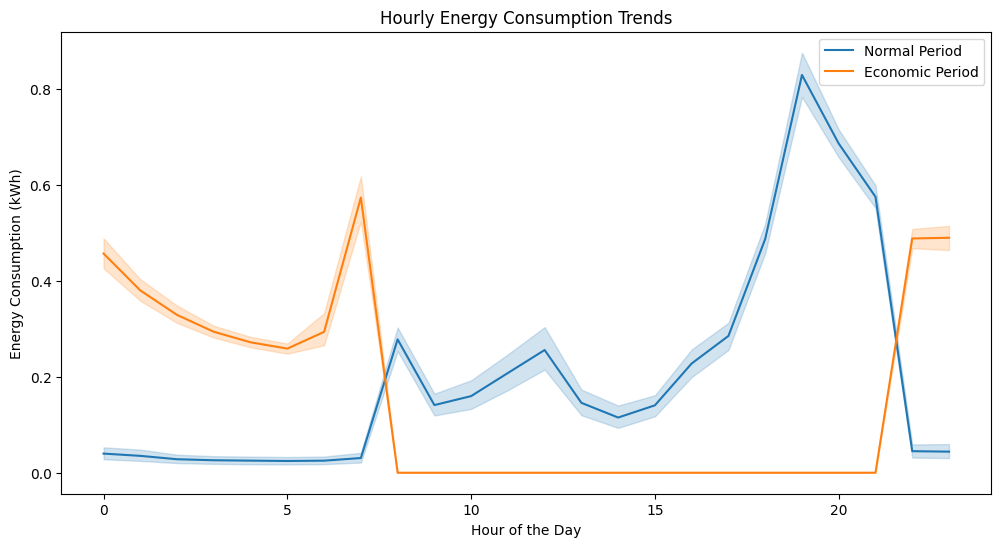

In [13]:
# Hourly energy consumption trends
plt.figure(figsize=(12, 6))
sns.lineplot(x='Hora', y='Normal (kWh)', data=df_energy, label='Normal Period')
sns.lineplot(x='Hora', y='Horário Económico (kWh)', data=df_energy, label='Economic Period')
plt.title('Hourly Energy Consumption Trends')
plt.xlabel('Hour of the Day')
plt.ylabel('Energy Consumption (kWh)')
plt.legend()
plt.show()

### **Energy Injection Levels Distribution**

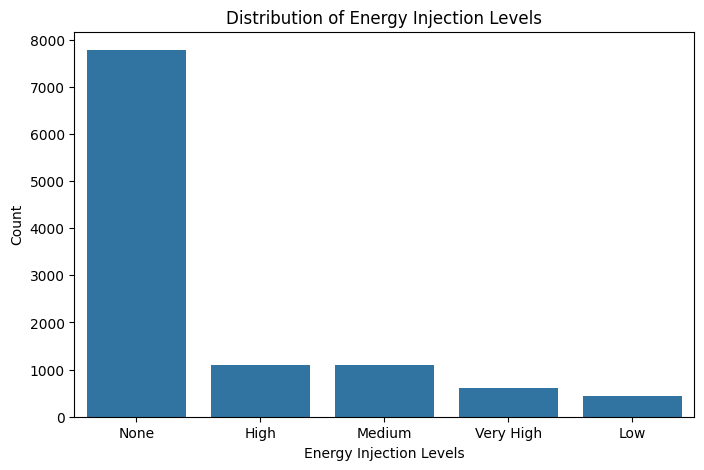

In [14]:
# Energy injection levels distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Injeção na rede (kWh)', data=df_energy, order=df_energy['Injeção na rede (kWh)'].value_counts().index)
plt.title('Distribution of Energy Injection Levels')
plt.xlabel('Energy Injection Levels')
plt.ylabel('Count')
plt.show()

### **Energy Consumption vs Autoconsumption**

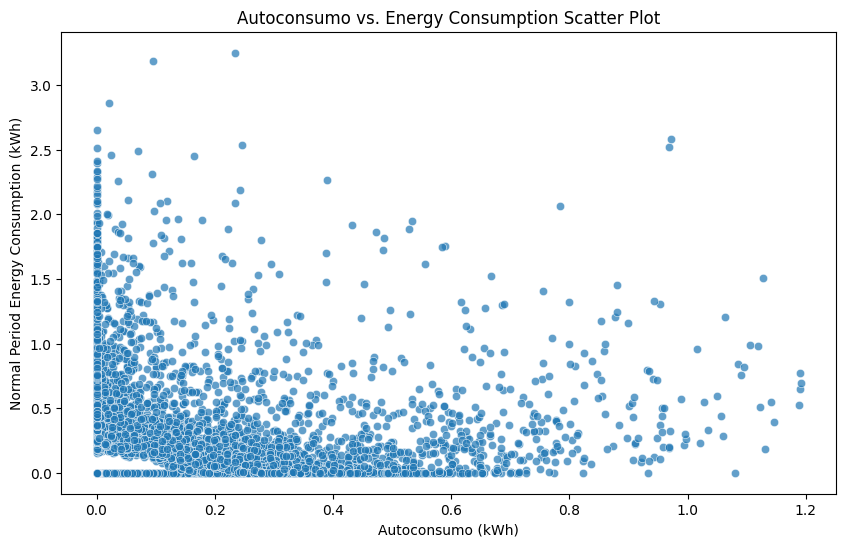

In [15]:
# Autoconsumo vs. Energy Consumption scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Autoconsumo (kWh)', y='Normal (kWh)', data=df_energy, alpha=0.7)
plt.title('Autoconsumo vs. Energy Consumption Scatter Plot')
plt.xlabel('Autoconsumo (kWh)')
plt.ylabel('Normal Period Energy Consumption (kWh)')
plt.show()

### **Energy Consumption Distribution By Hour**

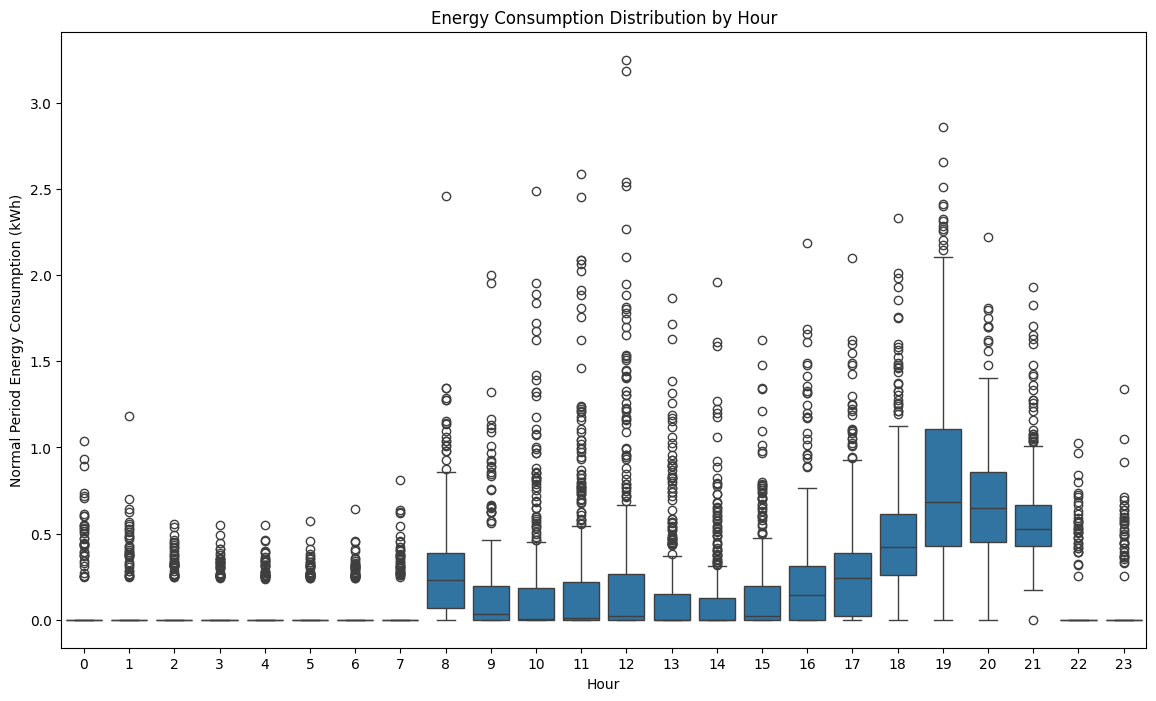

In [16]:
# Energy consumption distribution by hour
plt.figure(figsize=(14, 8))
sns.boxplot(x='Hora', y='Normal (kWh)', data=df_energy)
plt.title('Energy Consumption Distribution by Hour')
plt.xlabel('Hour')
plt.ylabel('Normal Period Energy Consumption (kWh)')
plt.show()

## **Weather Information Dataset**

### **Descriptive Statistics**

In [17]:
# Descriptive statistics for numeric columns
df_meteorology.drop(['dt'], axis=1).describe()

,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,clouds_all
count,11688.000000,11688.000000,11688.000000,11688.000000,11688.000000,11688.000000,11688.000000,11688.000000
mean,16.406638,16.076164,14.433353,17.502990,1018.304073,76.619011,2.647688,54.258214
std,5.715977,6.217605,4.960590,6.112344,6.109727,16.157421,1.458574,40.443374
min,0.320000,-2.190000,-0.640000,1.330000,994.000000,19.000000,0.060000,0.000000
25%,12.350000,11.760000,10.900000,12.930000,1015.000000,66.000000,1.610000,7.000000
50%,15.760000,15.675000,14.540000,16.720000,1018.000000,81.000000,2.380000,60.000000
75%,19.540000,19.560000,17.720000,20.700000,1022.000000,91.000000,3.400000,98.000000
max,40.850000,41.330000,36.720000,41.450000,1034.000000,100.000000,11.100000,100.000000


Descriptive statistics offer insights into numeric columns like 'temp', 'feels_like', 'pressure', 'humidity', etc., providing an understanding of weather conditions.

### **Weather Description Distribution**

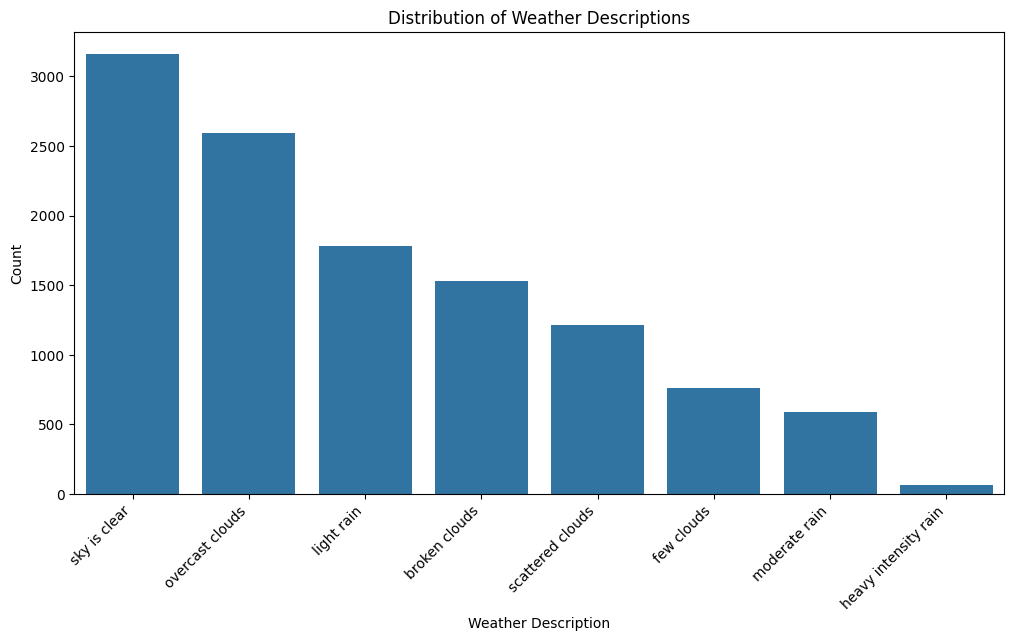

In [18]:
# Weather description distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='weather_description', data=df_meteorology, order=df_meteorology['weather_description'].value_counts().index)
plt.title('Distribution of Weather Descriptions')
plt.xlabel('Weather Description')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

### **Energy Consumption by Date and Hour**

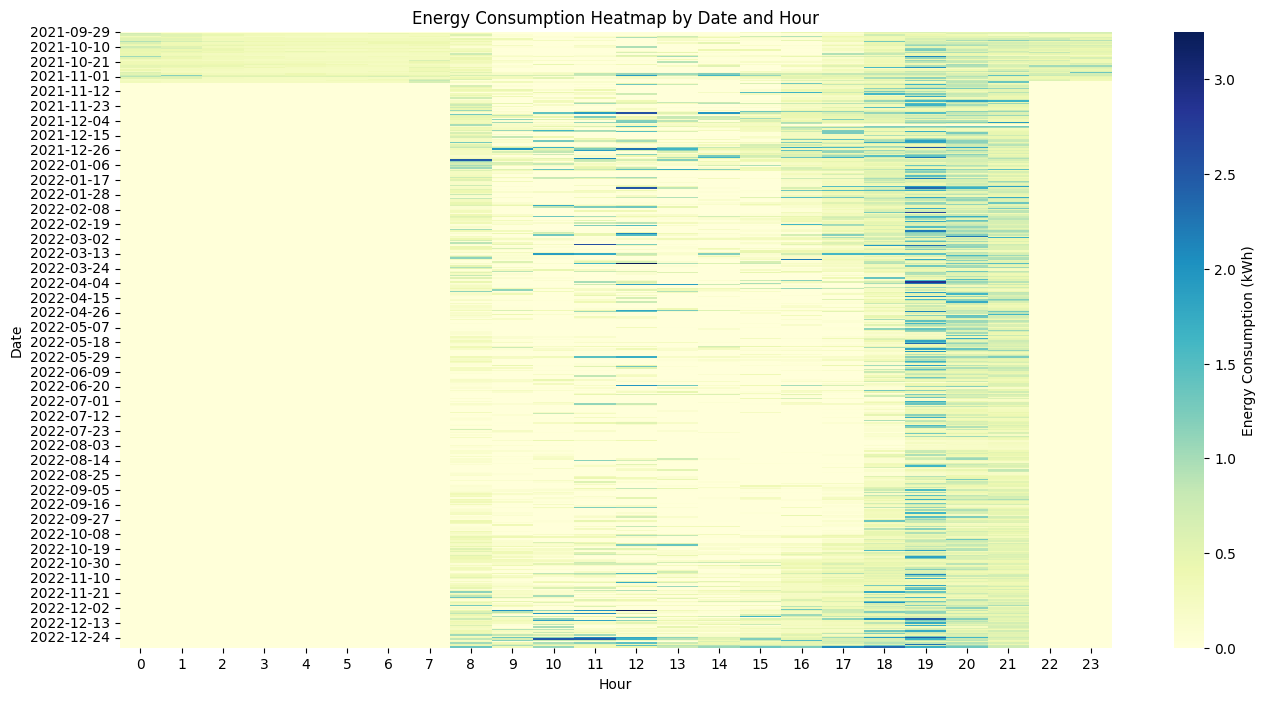

In [19]:
# Energy consumption heatmap by date and hour
heatmap_data = df_energy.pivot_table(values='Normal (kWh)', index='Data', columns='Hora', aggfunc='mean')
plt.figure(figsize=(16, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', cbar_kws={'label': 'Energy Consumption (kWh)'})
plt.title('Energy Consumption Heatmap by Date and Hour')
plt.xlabel('Hour')
plt.ylabel('Date')
plt.show()

### **Energy Consumption vs Energy Injection**

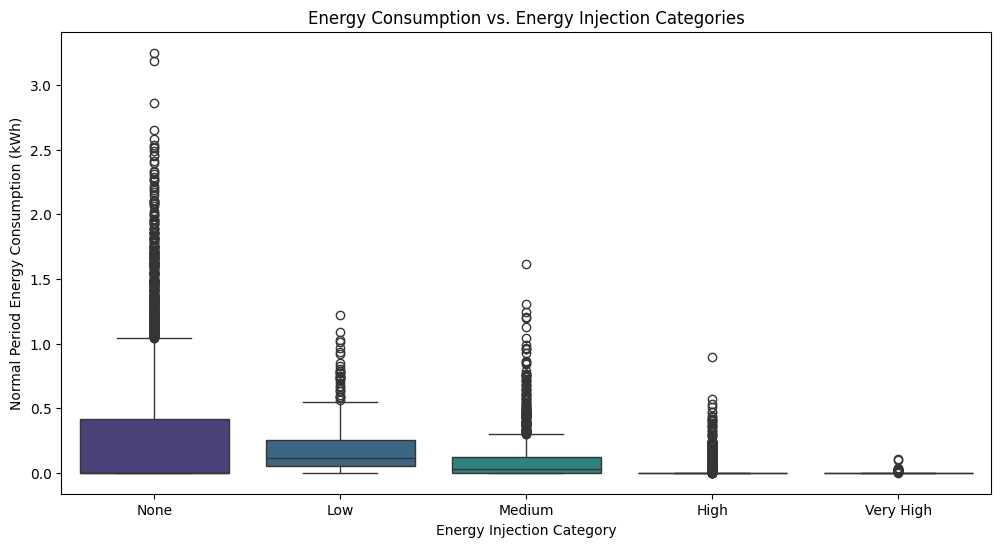

In [20]:
# Energy consumption vs. energy injection categories
plt.figure(figsize=(12, 6))
sns.boxplot(x='Injeção na rede (kWh)', y='Normal (kWh)', hue ='Injeção na rede (kWh)', data=df_energy, order=['None', 'Low', 'Medium', 'High', 'Very High'], palette='viridis')
plt.title('Energy Consumption vs. Energy Injection Categories')
plt.xlabel('Energy Injection Category')
plt.ylabel('Normal Period Energy Consumption (kWh)')
plt.show()

### **Hourly Distribution Of Energy Injection**

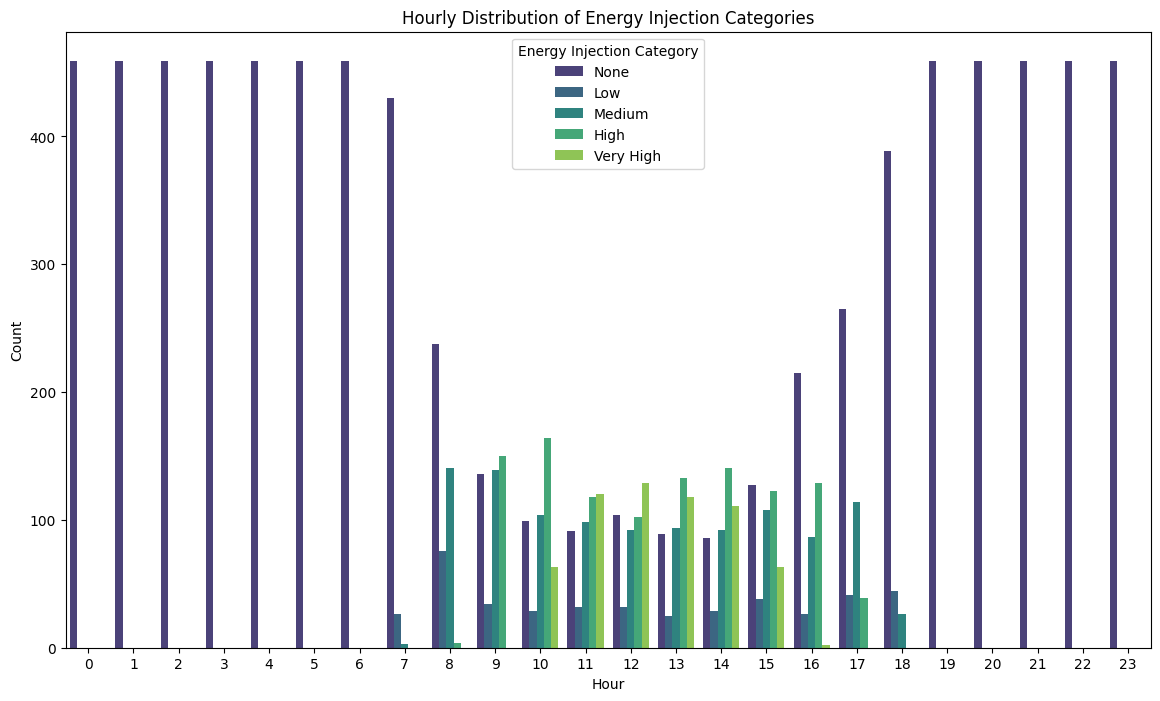

In [21]:
# Hourly distribution of energy injection categories
plt.figure(figsize=(14, 8))
sns.countplot(x='Hora', hue='Injeção na rede (kWh)', data=df_energy, order=range(24), palette='viridis')
plt.title('Hourly Distribution of Energy Injection Categories')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.legend(title='Energy Injection Category')
plt.show()

In [22]:
# Exporting the datasets to CSV files
df_energy.to_csv('datasets/energy.csv', index=False, encoding = "latin")
df_meteorology.to_csv('datasets/meteorology.csv', index=False, encoding = "latin")